In [1]:
import numpy as np 
import pandas as pd

# 1. Đọc dữ liệu

In [2]:
df = pd.read_csv('D:\DATA\Online_Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

dữ liệu có 541909 bản ghi và 8 cột

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# 2. Tiền xử lý dữ liệu

In [4]:
# Đếm số lượng cột có giá trị null
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Ta thấy ở cột Description có tất cả 1454 giá trị null và CustomerID có 135080 giá trị null
<br>
Vì vậy ta cần xóa bỏ các bản ghi có Description giá trị null vì điều này có thể gây ảnh hưởng tới quá trình tìm ra luật kết hợp
<br>Còn các bản ghi  có CustomerID null thì sẽ đặt là "Uknowns"để không làm mất đi các giao dịch và làm tăng độ chỉnh xác của luật kết hợp

In [7]:
# xóa bản ghi có Description=null
df = df.dropna(subset=['Description'])
# đặt các bản ghi CustomerID=null thành "Uknowns"
df['CustomerID'].fillna('unknown', inplace=True)

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
# kiểm tra Quantity và UnitPrice có giá trị âm không
df[df['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [18]:
df[df['UnitPrice']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,unknown,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,unknown,United Kingdom


In [19]:
print(len(df))
# loại bỏ những Quantity và UnitPrice có giá trị âm
df=df[(df['Quantity']>0) & (df['UnitPrice']>0)]
print(len(df))


540455
530104


# 3. Phân tích khám phá dữ liệu

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df.describe()

,Quantity,UnitPrice
count,530104.000000,530104.000000
mean,10.542037,3.907625
std,155.524124,35.915681
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


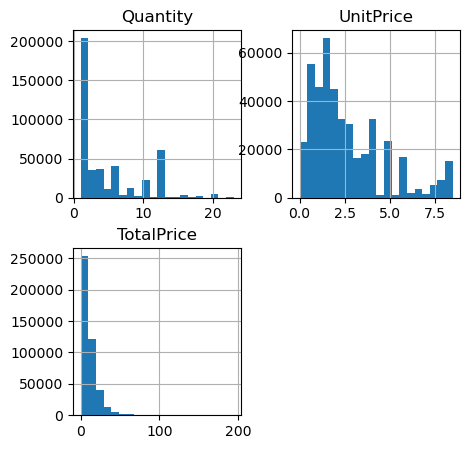

In [45]:
# Histograms for numerical features
df.hist(figsize=(5, 5), bins=20)
plt.show()

In [21]:
# Creating a 'TotalPrice' column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Aggregating data per customer
customer_df = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Number of unique purchases (transactions)
    'TotalPrice': 'sum',  # Total spending
    'Quantity': 'sum'  # Total number of items purchased
}).rename(columns={'InvoiceNo': 'TransactionCount'}).reset_index()
customer_df

,CustomerID,TransactionCount,TotalPrice,Quantity
0,12346.0,1,77183.60,74215
1,12347.0,7,4310.00,2458
2,12348.0,4,1797.24,2341
3,12349.0,1,1757.55,631
4,12350.0,1,334.40,197
...,...,...,...,...
4334,18281.0,1,80.82,54
4335,18282.0,2,178.05,103
4336,18283.0,16,2094.88,1397
4337,18287.0,3,1837.28,1586


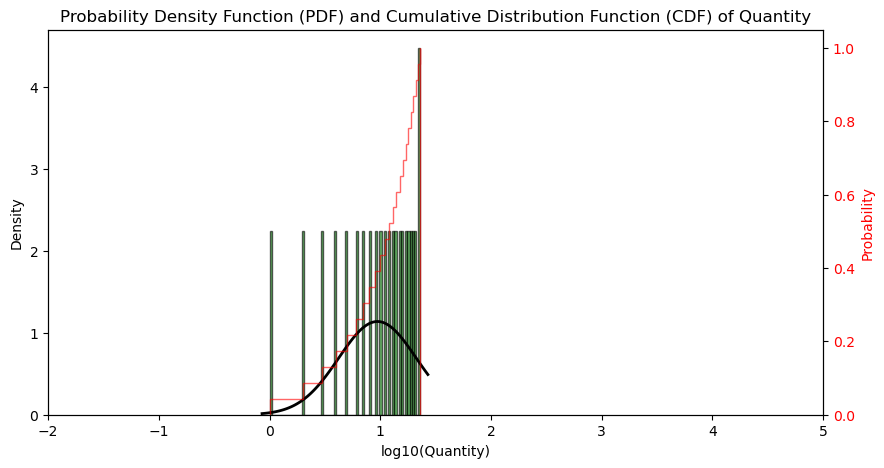

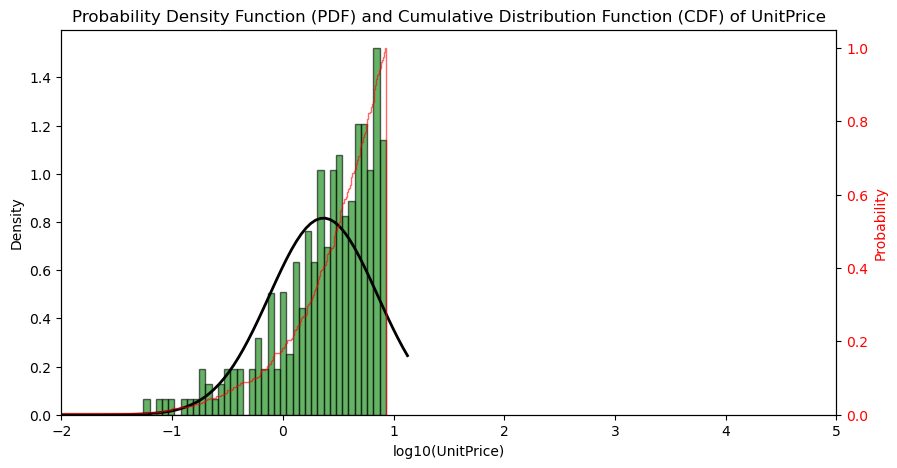

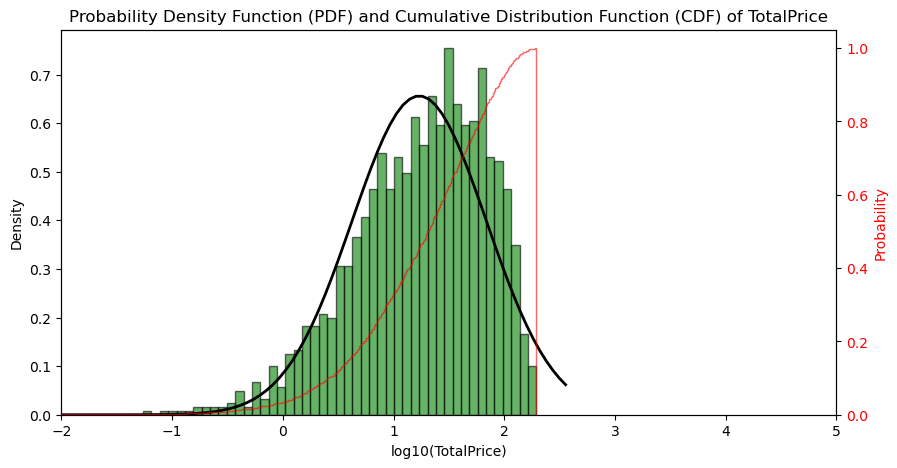

In [46]:
from scipy.stats import norm 

for col in ["Quantity", "UnitPrice", "TotalPrice"]:
    # Calculate Frequency of each col value
    stats_df = df.groupby(col).size().reset_index(name='frequency')

    # Initialize figure and axes instances
    fig, ax1 = plt.subplots(figsize=(10, 5))
    # Axes 1
    ax1.hist(np.log10(stats_df[col]), 
            bins=70, 
            density=True,
            alpha=0.6, 
            color='g',
            edgecolor = "black")  # Histogram for empirical PDF

    xmin, xmax = ax1.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, np.mean(np.log10(stats_df[col])), 
                np.std(np.log10(stats_df[col])))  # Theoretical PDF (assuming normal distribution)

    ax1.plot(x, p, 'k', linewidth=2)
    ax1.set_title(f'Probability Density Function (PDF) and Cumulative Distribution Function (CDF) of {col}')
    ax1.set_xlabel(f'log10({col})')
    ax1.set_ylabel('Density')
    ax1.set_xlim(-2, 5)

    # Axes 2
    ax2=ax1.twinx()
    ax2.hist(np.log10(stats_df[col]), 
            bins=500, 
            density=True, 
            cumulative=True, 
            alpha=0.6, 
            color='r', 
            histtype='step')  # Empirical CDF
    ax2.set_xlim(-2, 5)
    ax2.set_ylabel('Probability', color='r')
    ax2.tick_params(axis='y', labelcolor='r');

{'whiskers': [<matplotlib.lines.Line2D at 0x22fbc844490>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbfbb6010>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fb27eced0>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbfbb7910>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbc827d90>],
 'means': []}

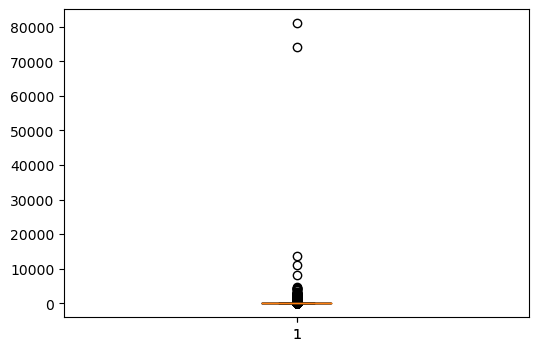

In [26]:
# xem biểu đồ boxplot tìm ra outline
import matplotlib
matplotlib.rcParams['figure.figsize']=(6,4)
plt.boxplot(df.Quantity)


{'whiskers': [<matplotlib.lines.Line2D at 0x22fbb925d90>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbc837a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbb8de350>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbb924050>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbc835390>],
 'means': []}

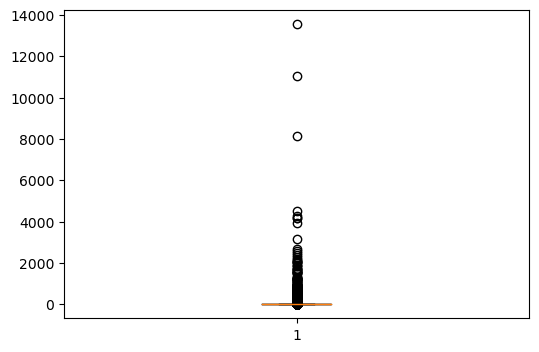

In [27]:
matplotlib.rcParams['figure.figsize']=(6,4)
plt.boxplot(df.UnitPrice)

In [28]:
# Loại bỏ outliers
q_low = df["Quantity"].quantile(0.25) # Calculate percentiles
q_hi  = df["Quantity"].quantile(0.75)

IQR=q_hi-q_low

# Filter out outliers
df=df[~((df['Quantity']<(q_low-1.5*IQR)) | (df['Quantity']>(q_hi+1.5*IQR)))]


q_low = df["UnitPrice"].quantile(0.25)
q_hi  = df["UnitPrice"].quantile(0.75)

IQR=q_hi-q_low

# Filter out outliers
df=df[~((df['UnitPrice']<(q_low-1.5*IQR)) | (df['UnitPrice']>(q_hi+1.5*IQR)))]

{'whiskers': [<matplotlib.lines.Line2D at 0x22fbc63be90>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbfb61ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbc63add0>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbc63bb90>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbb95e450>],
 'means': []}

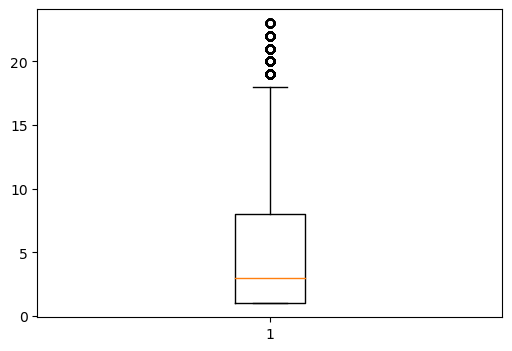

In [29]:
# sau khi bỏ outlier
matplotlib.rcParams['figure.figsize']=(6,4)
plt.boxplot(df.Quantity)

{'whiskers': [<matplotlib.lines.Line2D at 0x22fbbd3dd50>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbbd3ef90>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbbd3cad0>],
 'medians': [<matplotlib.lines.Line2D at 0x22fcd6fc390>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbb93f210>],
 'means': []}

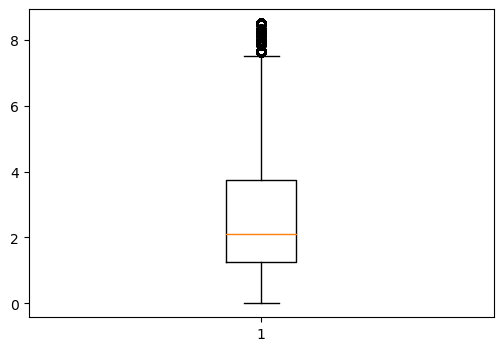

In [30]:
matplotlib.rcParams['figure.figsize']=(6,4)
plt.boxplot(df.UnitPrice)

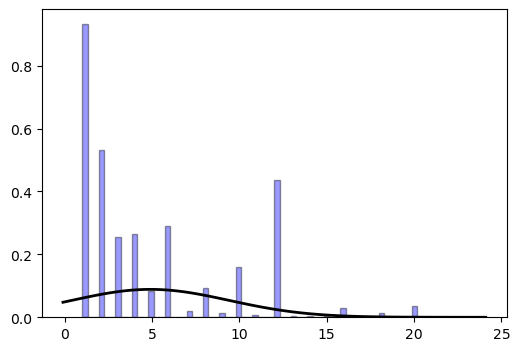

In [35]:

from scipy.stats import norm
mean,std = norm.fit(df.Quantity)
plt.figure(figsize=(6,4))
plt.hist(df.Quantity,bins=70,density=True,alpha=0.4, color="b",edgecolor='k')
xmin,xmax = plt.xlim()
x=np.linspace(xmin,xmax,100)
p= norm.pdf(x, mean, std)
plt.plot(x,p,'k', linewidth=2)

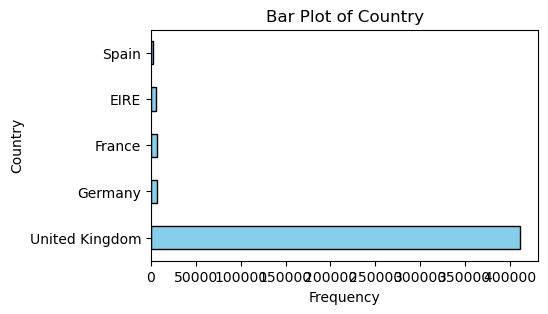

Country
United Kingdom    411183
Germany             6822
France              6382
EIRE                5593
Spain               1920
Name: count, dtype: int64


In [39]:
df['Country'].value_counts().head(5).plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Bar Plot of Country')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.show()
print(df['Country'].value_counts().head(5))

In [47]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60
